## MountainCar - manually playing the environment

#### https://gymnasium.farama.org/environments/classic_control/mountain_car/

In [ ]:
# let's try our second environment - MountainCar

import gymnasium as gym
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output


# I make 2 notebooks files because if (from gymnasium.utils import play) is using the same time with other library.
# I am facing the issue kernal is crashed. 
# The Kernel crashed while executing code in the current cell or a previous cell.  Please review the code in the cell(s) to identify a possible cause of the failure. 

#### The point of this part of the exercise is to experiment with a custom code that attempts to solve the environment without RL algorithms. It's not probably feasible to actually solve this environment with a custom simple agent, but to experiment with the amount of variables and situations what has be taken into account while landing the car on top of the mountain. 

In [7]:
# make the env
env = gym.make("MountainCar-v0", render_mode='rgb_array', max_episode_steps=-1)

# visualize the environment
env.reset()
#plt.imshow(env.render())

(array([-0.44598672,  0.        ], dtype=float32), {})

# Environment Challenges

In [ ]:
# 1- Precise Stopping on the Flag (Position Control)
# Challenge: Stop exactly at position = 0.5 (the flag) without overshooting.
# Why: Going even slightly over (like 0.501) can make the car slide down the other side and fail.

# 2- Dealing with Slippery Surface
# Challenge: The car keeps sliding due to momentum, even when action = 0.
# Impact: It can drift past the flagpole after stopping.

# 3- Mountain Slope Dynamics (We maky call it hill as well in our class that we are use to say)
# Challenge: Steeper slopes cause faster downhill acceleration.

# 4- Acceleration vs Deceleration 
# Challenge: If the car is still moving right near the top, it must push left to slow down. (As in some experiments its stopped above to flag)
# Impact: Without this, it can fly past the flag or waste attempt.

# 5-Starting Position
# Challenge: The environment resets with random starting positions (typically between -0.6 and -0.4).
# Impact: Agent logic must generalize to all valid start states so can’t rely on a fixed on.

# 6- Right–Left Moment Swing
# Challenge: The car needs to move back and forth to go up the hill.
# Impact: If it doesn’t swing, it can’t reach the flag. (if velocity > 0.0 and position < 0.0: return 2)

# 7-Early Termination by Braking Too Soon
# Challenge: Stopping too early (like at 0.45) keeps the car from reaching the flag.
# Impact: The car must stop very close to 0.5, or it will miss the flag.

# 8- Controlling stopping over the flag
# Challenge: If the car overshoots the peak, gravity will accelerate it downhill.
# Impact: Must stop early and gently, or risk re-entering the pit.

# 9- Most Importat Efficeincy in Rewards 
# Challenge: Maximize reward by reaching the goal in fewer steps — current logic doesn't optimize for that.

# Further Optimization will be
# Consider tuning parameters to not just reach the goal but reach it faster and cleaner.


# I got best resutlts with all of experiments and challanges with these paramteres, I reached at goal and also took screenshots
# These screenshots also attached last of this notebook, Also best code logic going to mention here

#if position > 0.47:   return 0 if velocity > 0.0 and position < 0.0: return 2
# if velocity < 0.0 and position > -0.50:       return 0

In [8]:
def simple_agent(observation):
    # get position and velocity
    position, velocity = observation
    if isinstance(velocity, dict) and len(velocity) == 0:
        velocity = 0
    if isinstance(position, np.ndarray):
        position = position[0]
    action = 1

     # this might be between 0.05 - 0.1
    if position > 0.47:
        return 0
    if velocity > 0.0 and position < 0.0:
        return 2

    if velocity < 0.0 and position > -0.50:
        return 0

    return action



In [ ]:
env.reset()
clear_output(wait=True)
plt.imshow(env.render())
plt.show()


#Findings and explanation based on logs without altering code
# Position shows where the car is on the mountain.
# Velocity shows how fast and in which direction the car is moving.
# When velocity is positive, the car is moving right (uphill).
# When velocity is negative, the car is moving left (downhill).
# Big position jumps show the car is moving quickly.
# Change in position = +0.2541 its a  big jump to the right. Velocity: 0.0388 → A high positive value shows  car is moving fast uphill.
# A large negative position (like -1.1) means the car is far left, and Fluctuations in position/velocity show the car is swinging back and forth to build momentum.
# Positive velocity + increasing position = car is climbing and Negative velocity + decreasing position = car is falling back.



# reset internal values in the environment
# you can also lock down the random seed by using seed-parameter
# i.e. env.reset(seed=123)
observation = env.reset()

# play the environment for 225 steps with our simple agent
for step in range(225):
    action = simple_agent(observation)

    # get the feedback / observations from the environment after taking the step
    observation, reward, done, info, truncate = env.step(action)

    clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()

    print(f"Position: {observation[0]}")
    print(f"Velocity: {observation[1]}")

    # slow down the visual update
    time.sleep(0.001)

env.close()

![Screenshot 2025-04-17 at 09.29.35.png](<attachment:Screenshot 2025-04-17 at 09.29.35.png>)
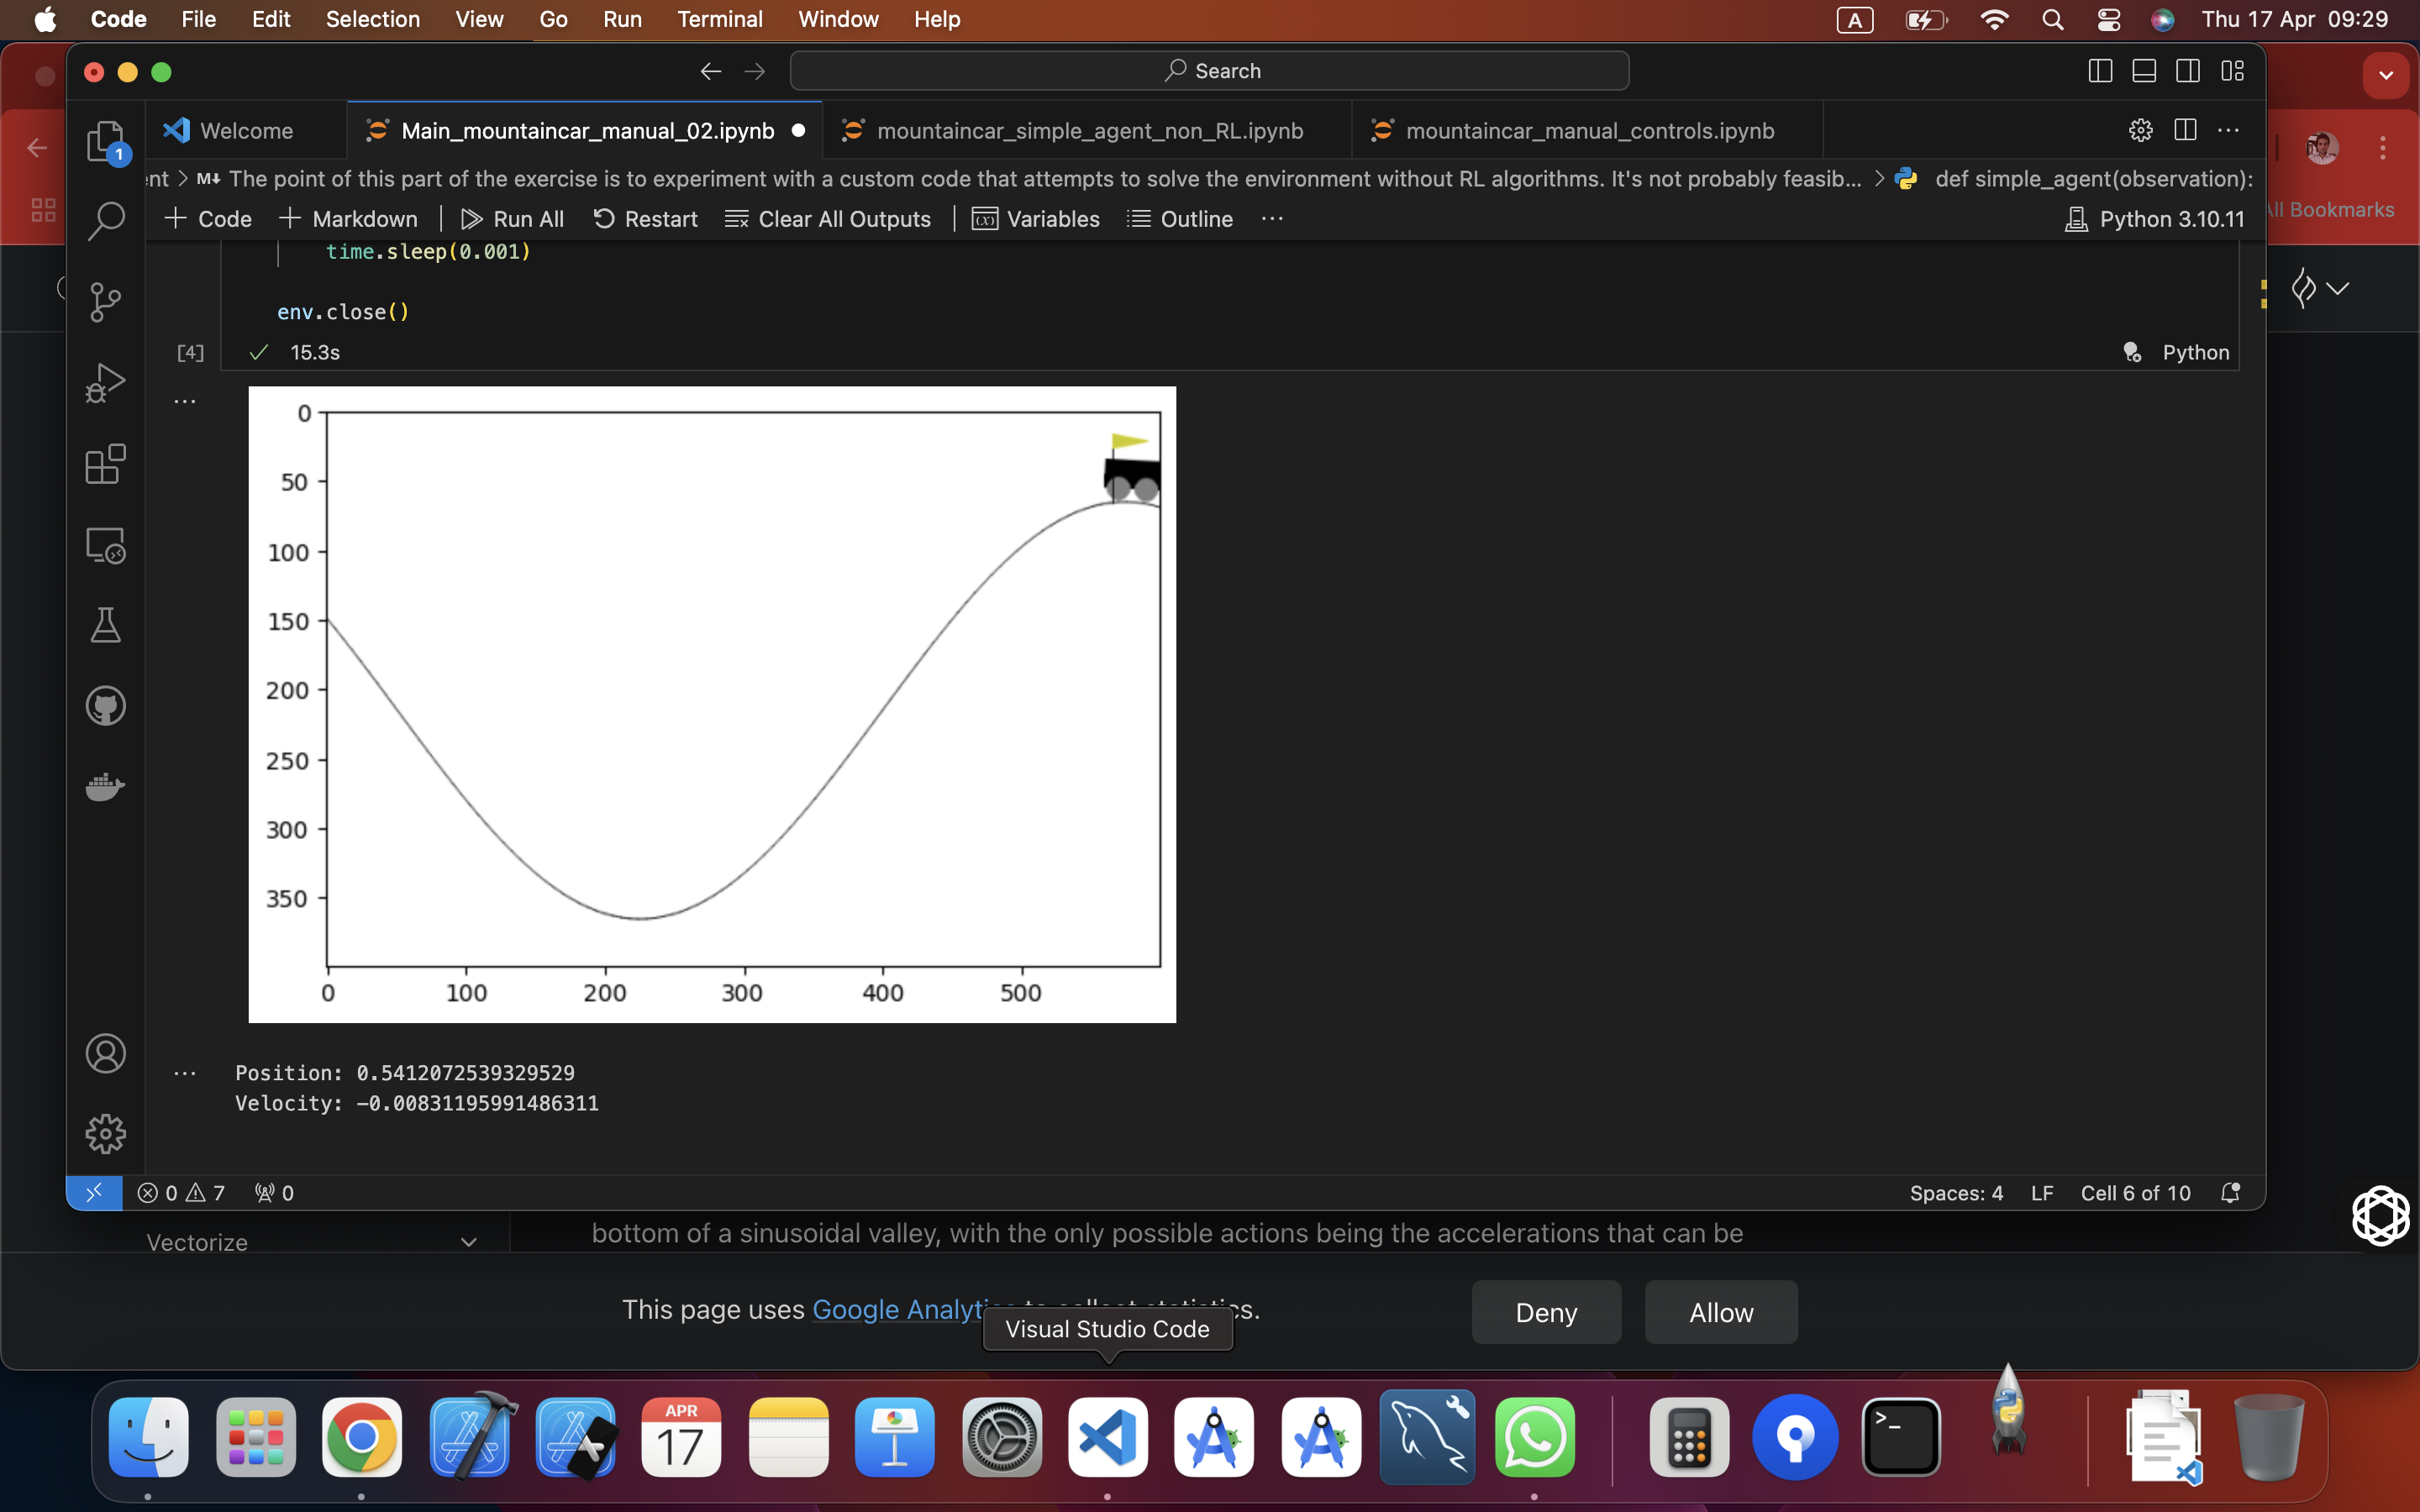

![Screenshot 2025-04-17 at 09.51.15.png](<attachment:Screenshot 2025-04-17 at 09.51.15.png>)
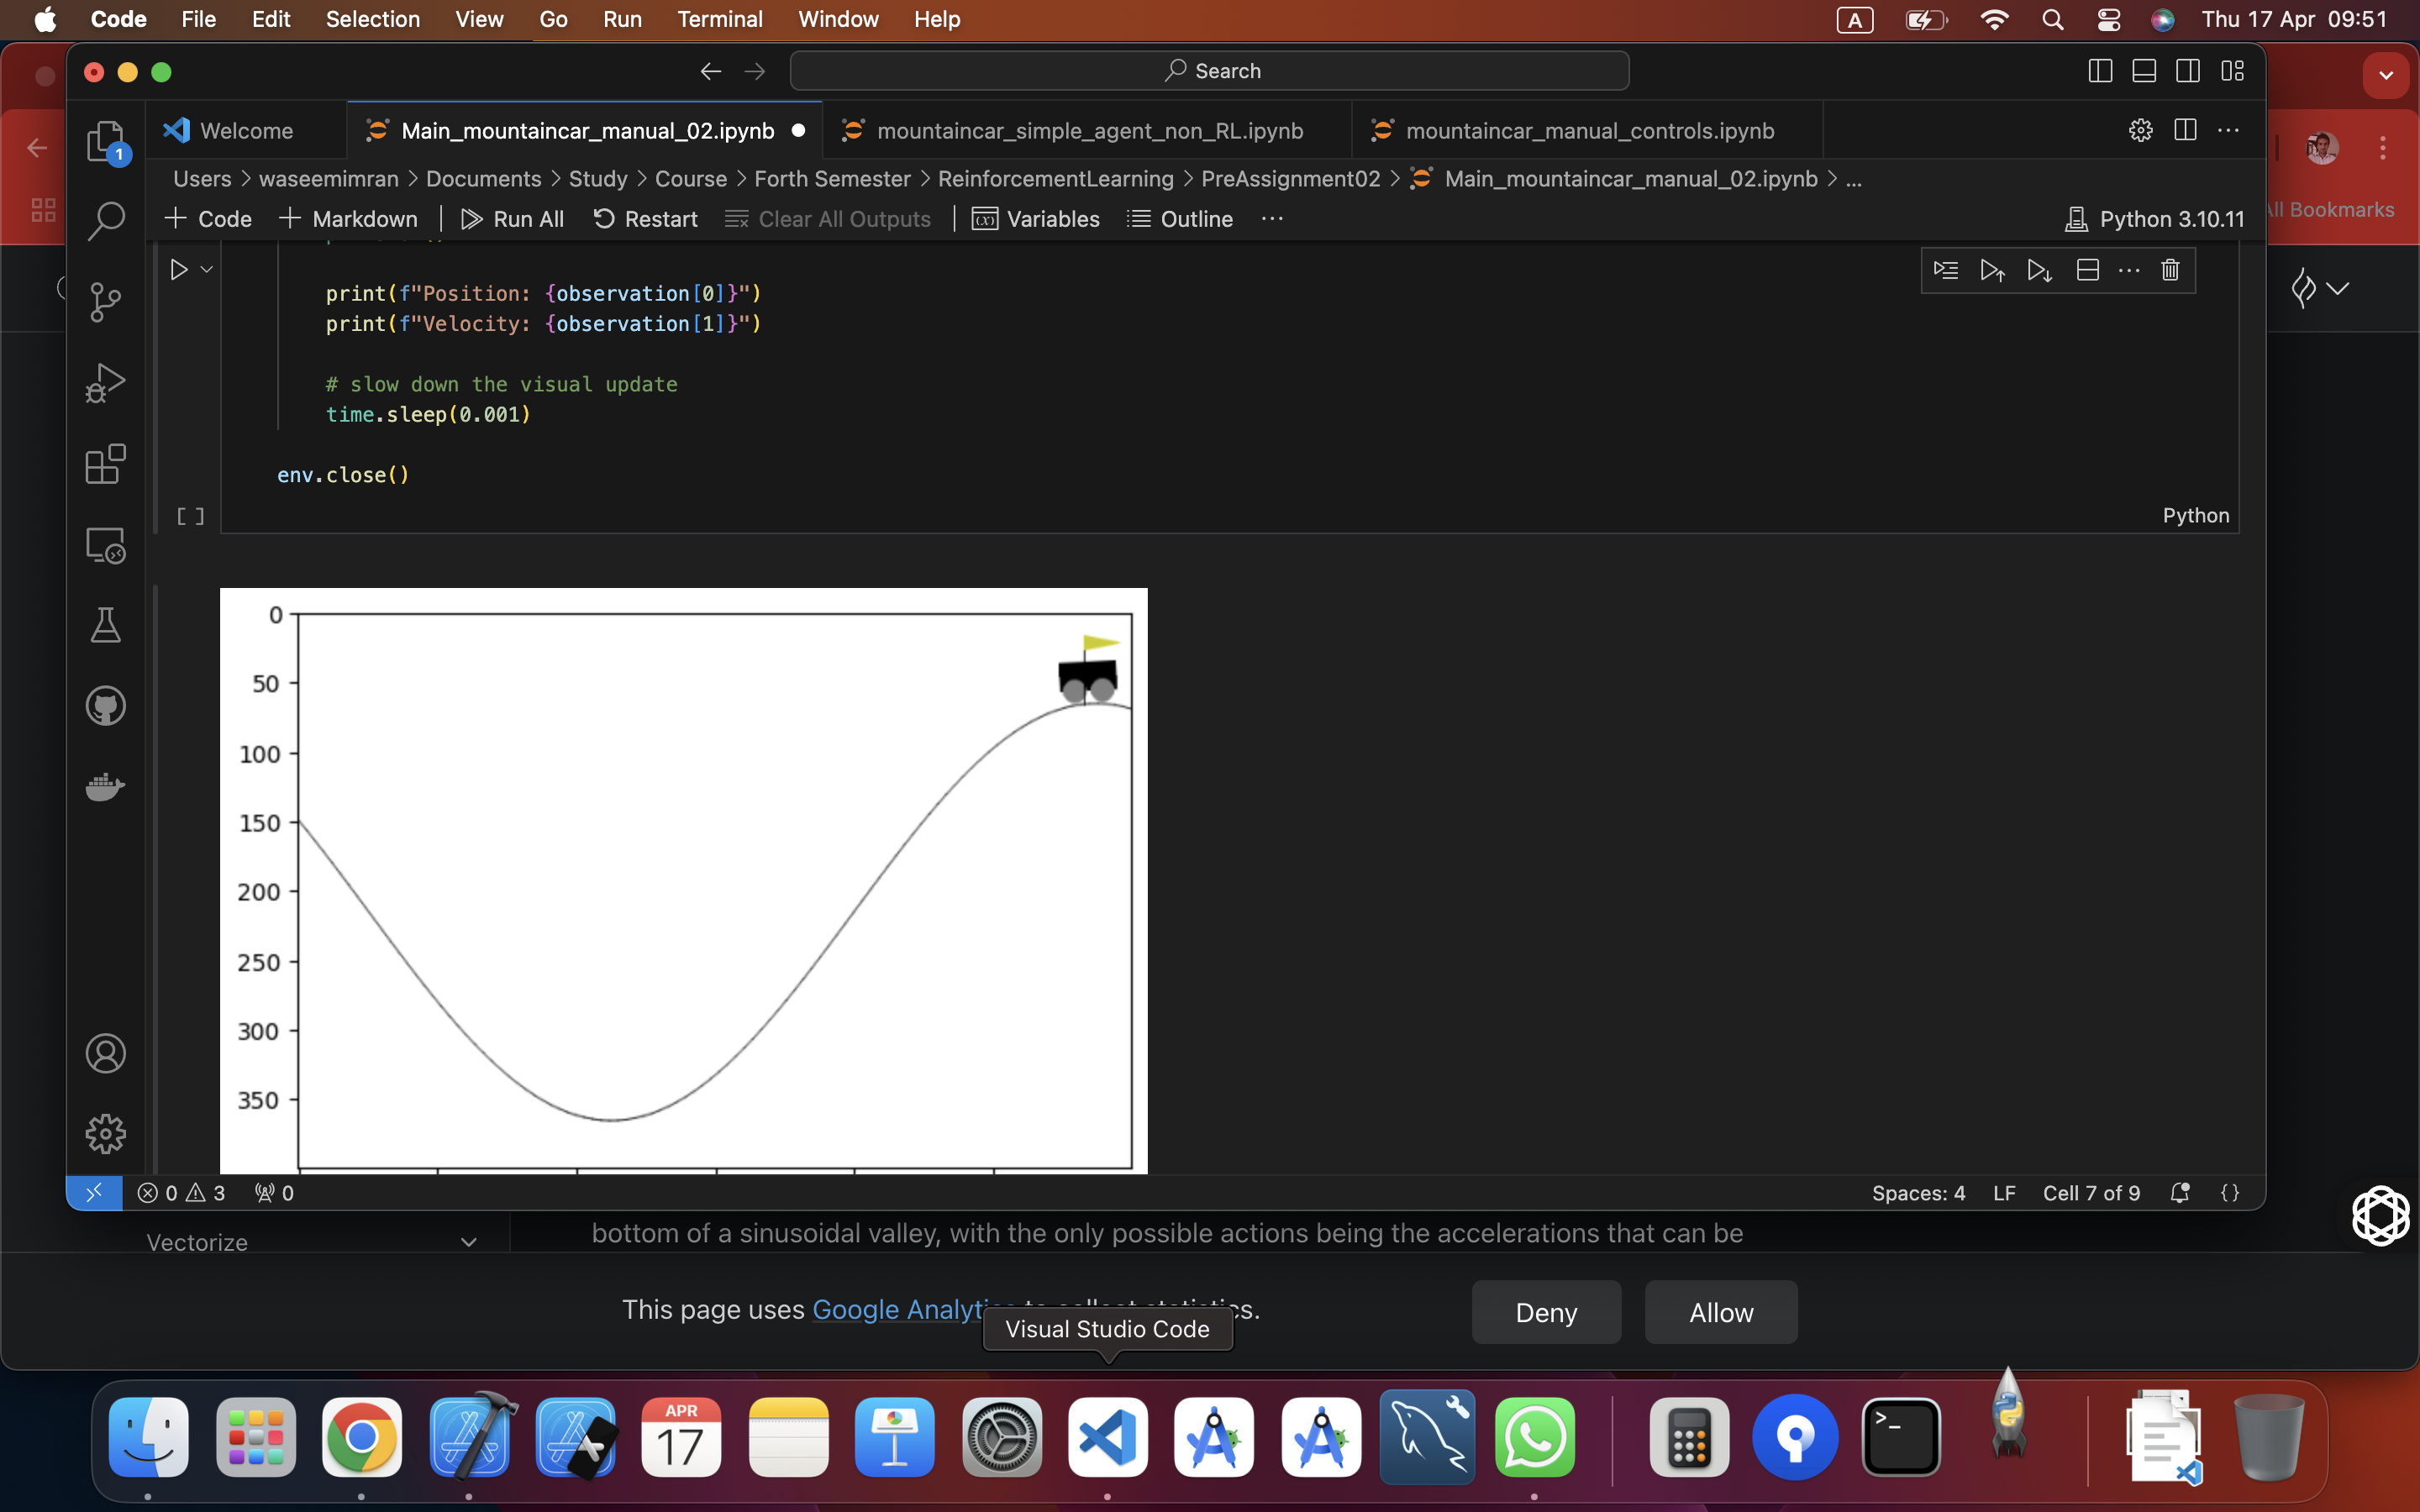